In [74]:
library(GeoDE)
install.packages("XLConnect", repos='http://cran.us.r-project.org')

Warning message:
In install.packages("RODBC", repos = "http://cran.us.r-project.org"): installation of package ‘RODBC’ had non-zero exit status

In [73]:
library(RODBC)
data = odbcConnectExcel(file.choose())
mydata = sqlFetch(data, "Sheet1")
odbcClose(data)
mydata

Warning message:
In install.packages("rJava", repos = "http://cran.us.r-project.org"): installation of package ‘rJava’ had non-zero exit status

In [2]:
data(example_expression_data)
data(example_sampleclass)
data(example_gammas)

In [3]:
head(example_expression_data)

,genenames,Controll,Controll.1,Controll.2,Pert.,Pert..1,Pert..2
1,MTERFD2,138.642,167.13,156.199,186.64,122.005,161.382
2,SCRIB,52.6538,38.9778,68.9632,94.3009,60.6343,99.0118
3,ZXDC,59.3739,53.9525,55.1033,82.7805,52.77,80.15
4,MRPL32,333.802,375.288,475.2,477.085,327.193,468.316
5,WDR69,0.33557,0.614205,0.989874,0.421603,0.890432,1.05624
6,FOXL1,1.03177,0.90172,1.64425,1.1704,1.33711,1.31237


In [4]:
(example_sampleclass)

[1] 1 1 1 2 2 2
Levels: 1 2

In [5]:
str(example_gammas)

List of 1
 $ : num 1


  |======================================================================| 100%


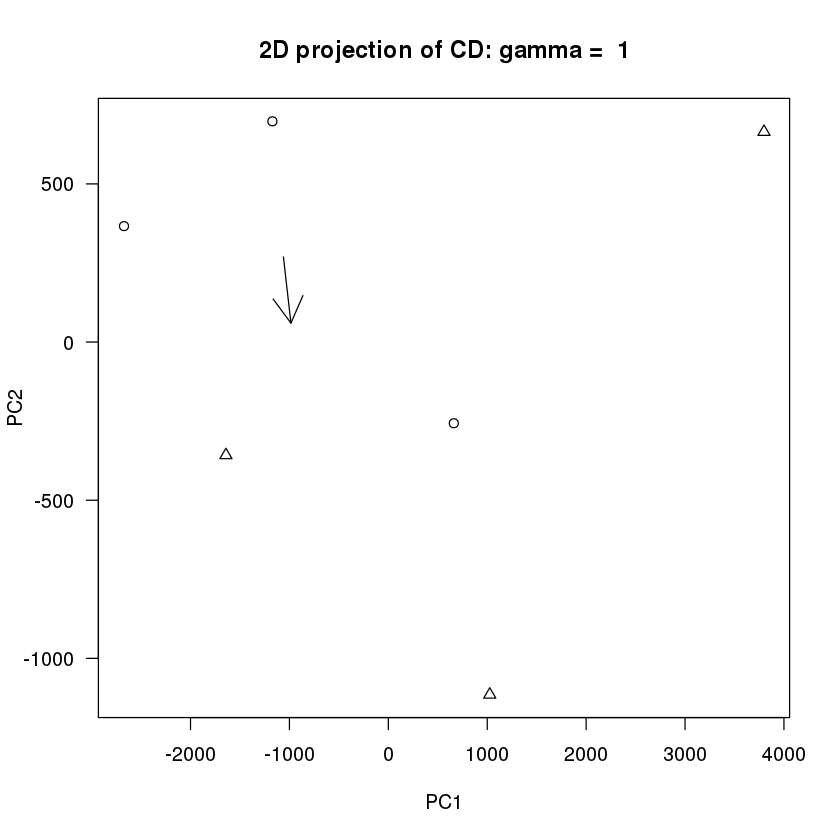

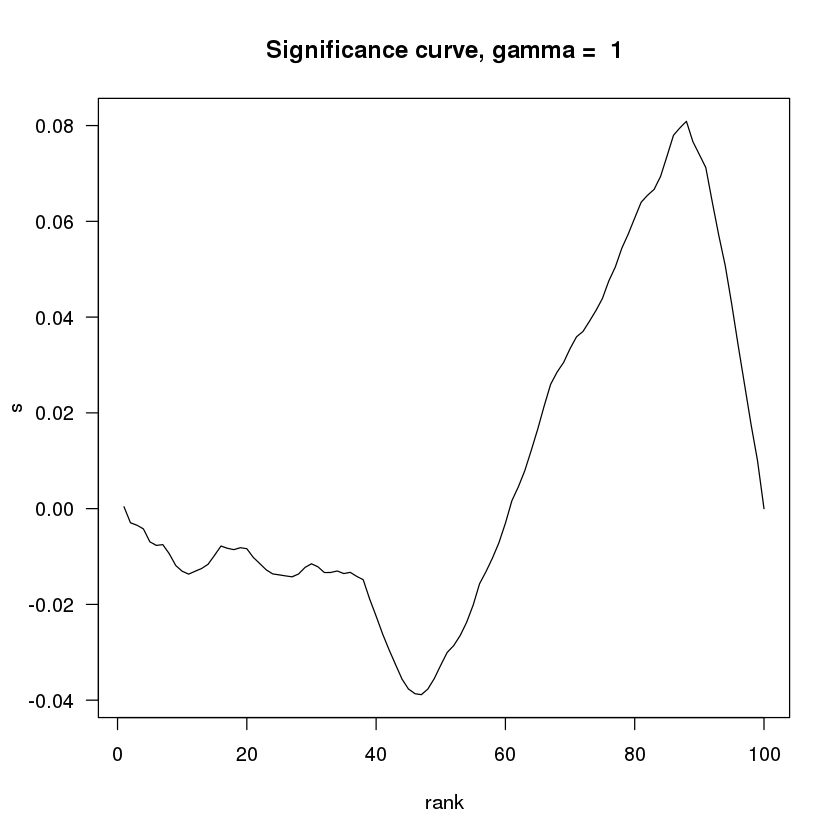

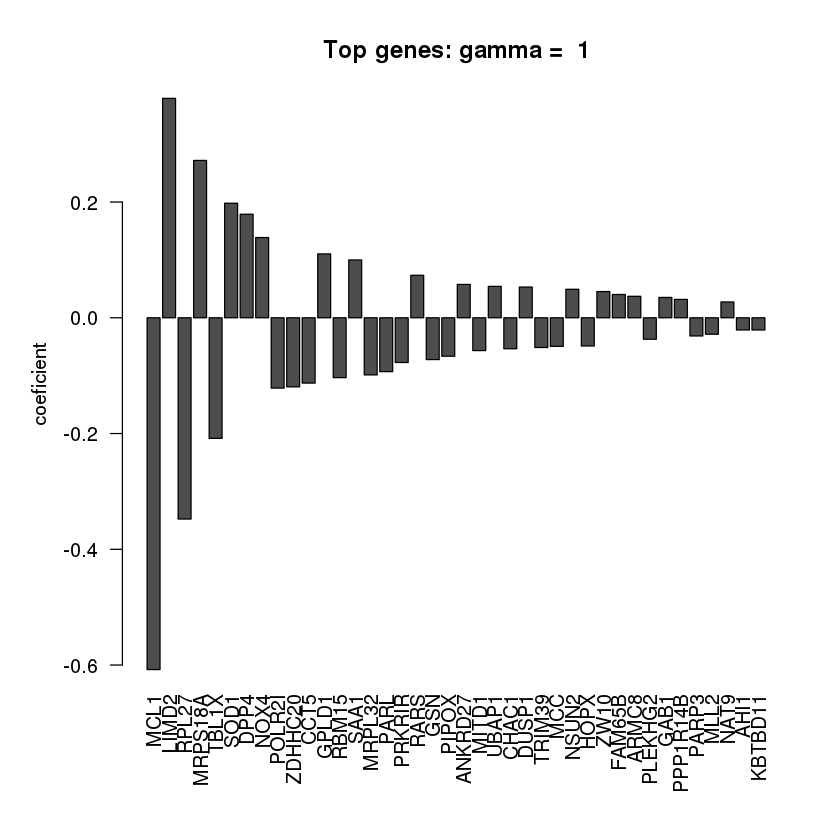

In [18]:
chdir_analysis_example <- chdirAnalysis(
    example_expression_data,
    example_sampleclass,
    list(1),
    CalculateSig=TRUE,
    nnull=100)

In [9]:
load('allen_brain/big12.Rdata')
load('allen_brain/big12vxg_vsn.Rdata')
load('allen_brain/top75_gene_names.Rdata')

In [19]:
colnames(big12vxg_vsn) <- genesAllen

In [20]:
dataT <- as.data.frame(t(big12vxg_vsn))

In [21]:
inputdatamat <- cbind(data.frame(genenames=genesAllen),dataT)
rownames(inputdatamat) <- NULL

In [22]:
striatum_or_not <- big12factors == 'Striatum'
sample_classes <- as.factor(striatum_or_not + 1) # 1 if not, 2 if striatum

In [41]:
all_voxels <- 1:dim(big12vxg_vsn)[1]

nvoxels <- 30
# ngenes <- length(genesAllen)
ngenes <- 100

mygenes <- sort(sample(1:length(genesAllen),ngenes))

downsampled_striatum_voxels <- sample(all_voxels[striatum_or_not],nvoxels/2)
downsampled_other_voxels <- sample(all_voxels[-striatum_or_not],nvoxels/2)

downsampled_voxels <- c(downsampled_striatum_voxels,downsampled_other_voxels) + 1

In [42]:
sample_classes_downsampled <- sample_classes[downsampled_voxels]
inputdatamat_downsampled <- inputdatamat[mygenes,c(1,downsampled_voxels)]
sample_classes_downsampled

[1] 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 1 2

  |======================================================================| 100%


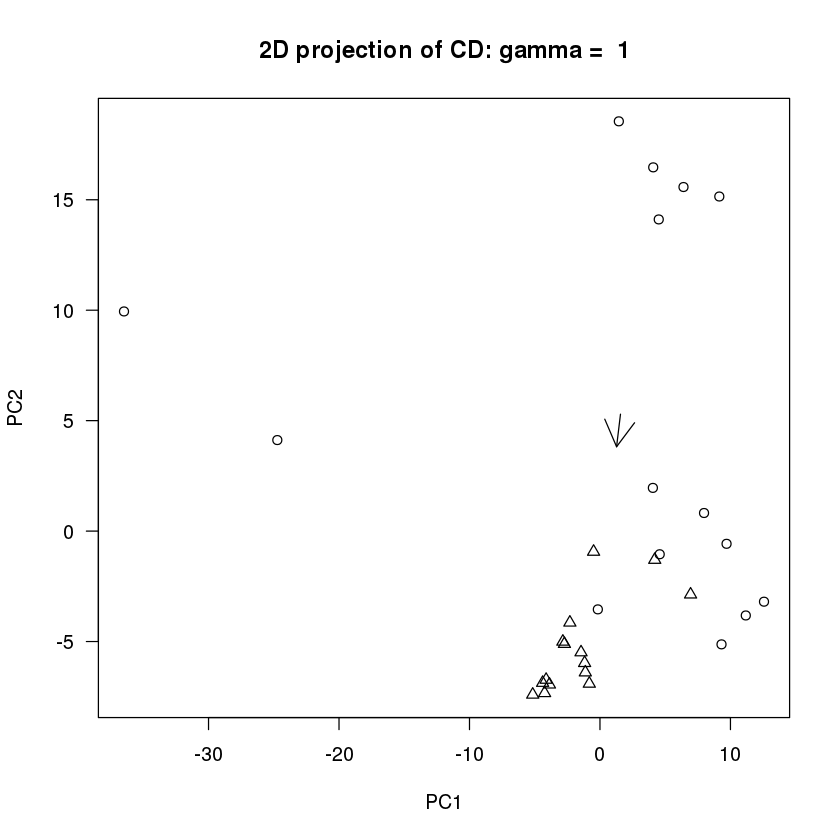

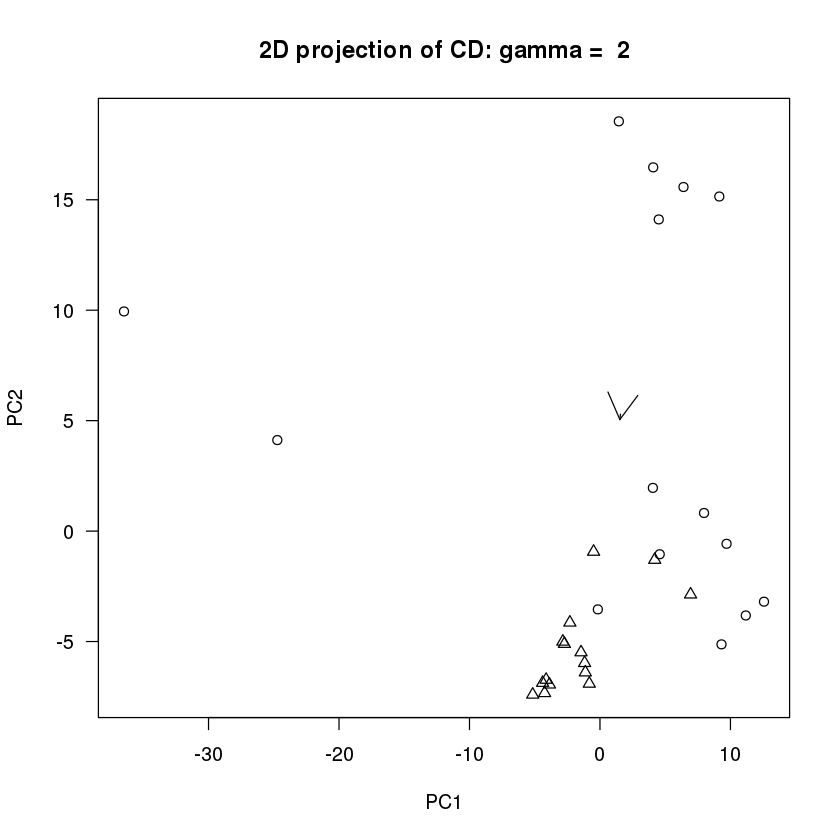

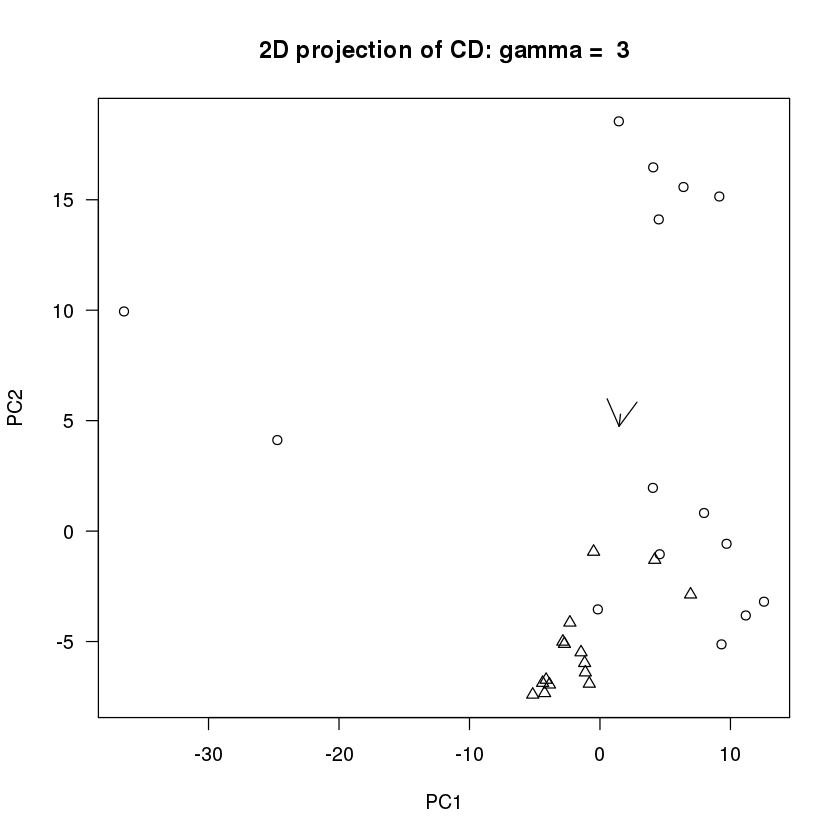

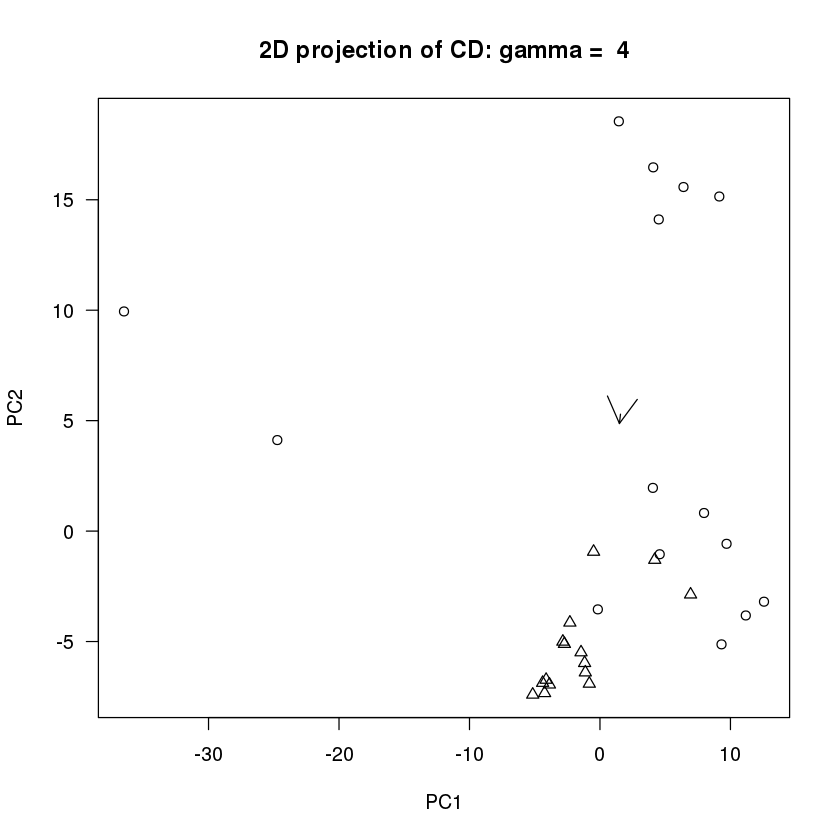

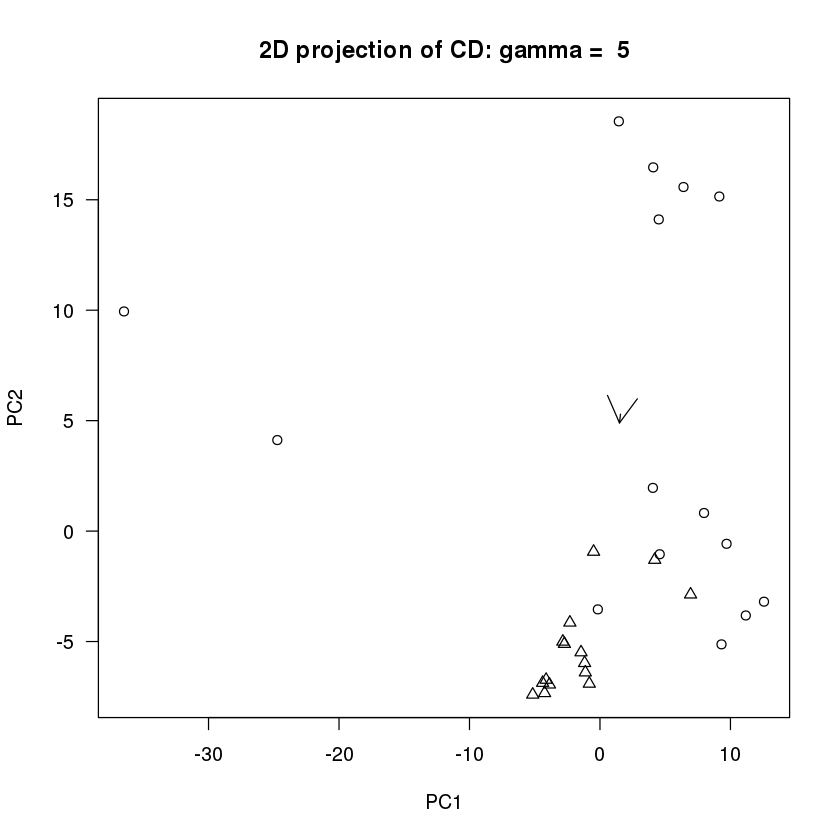

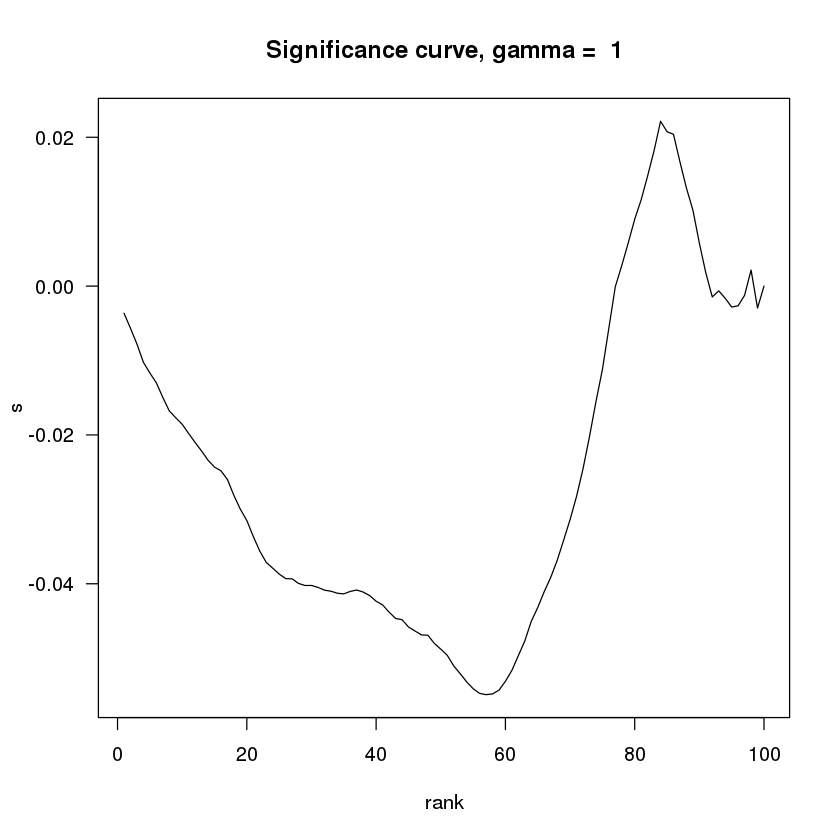

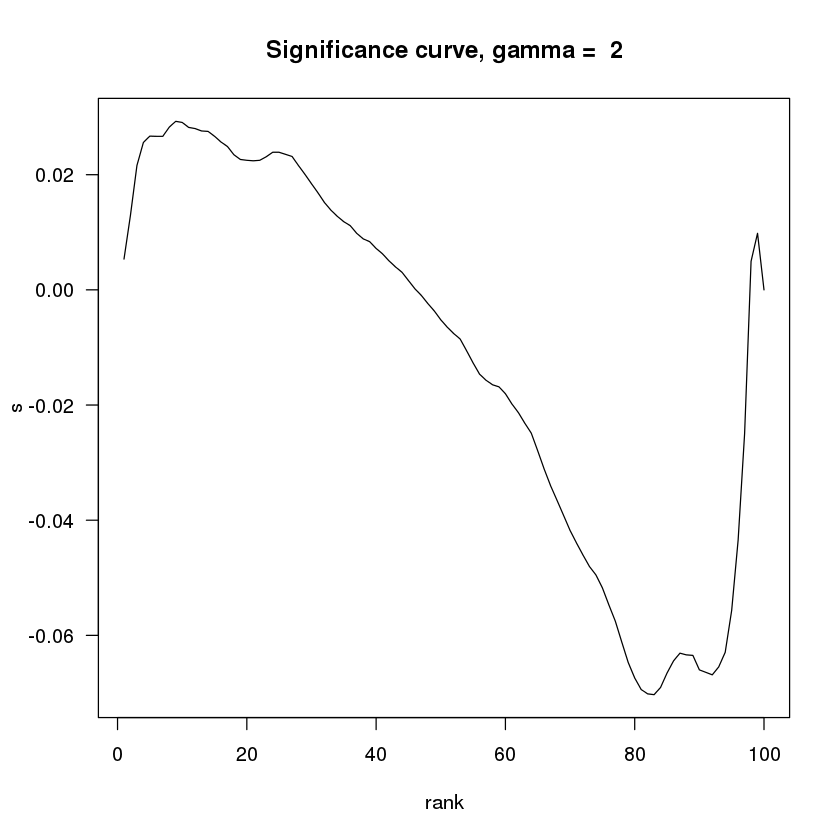

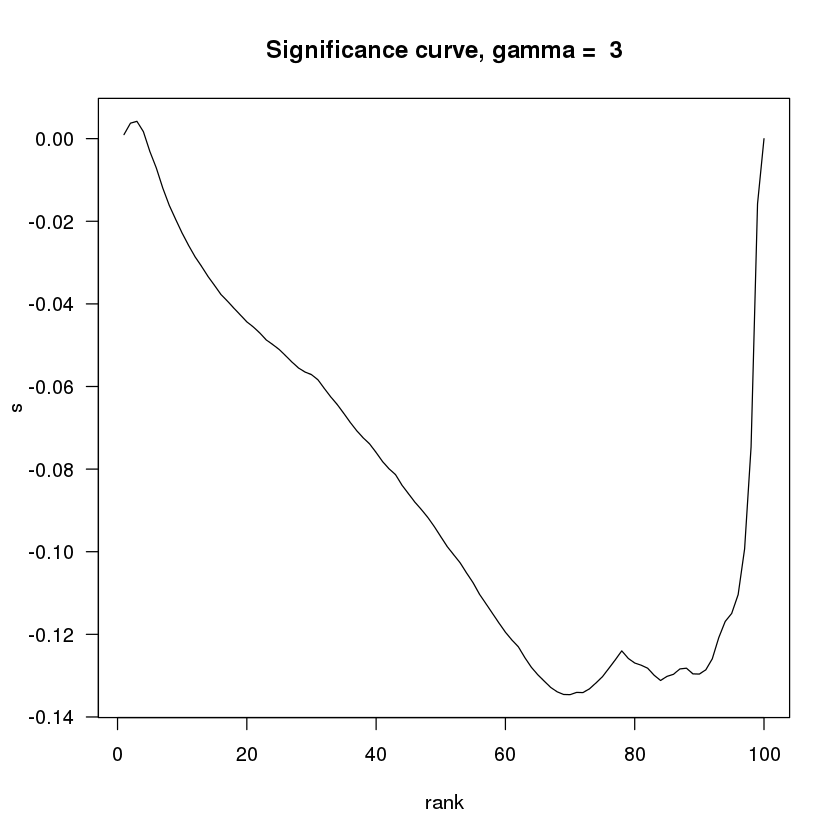

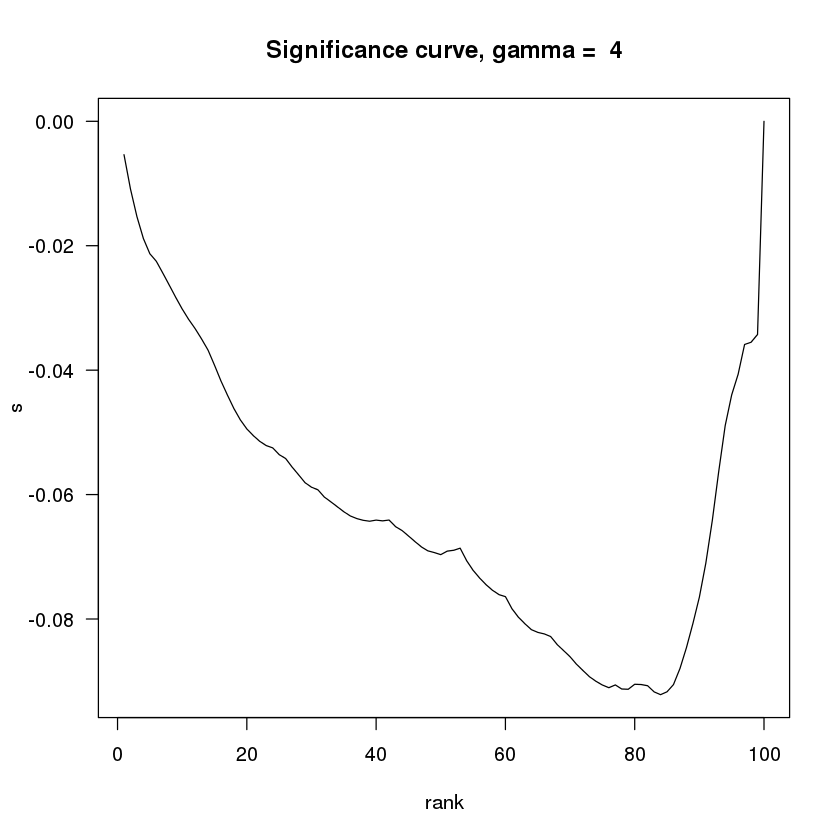

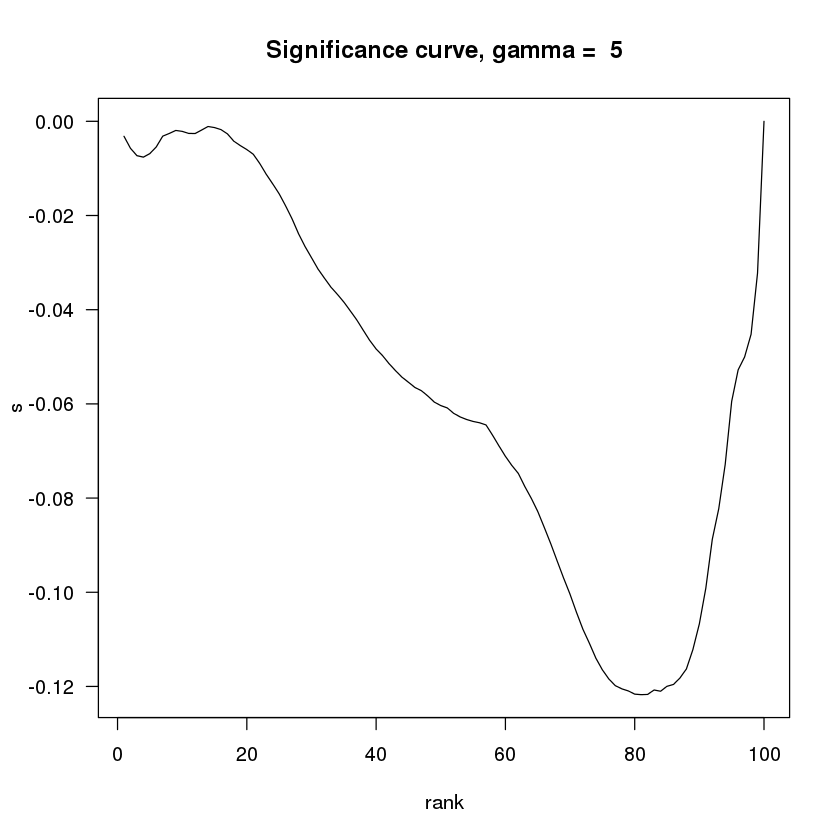

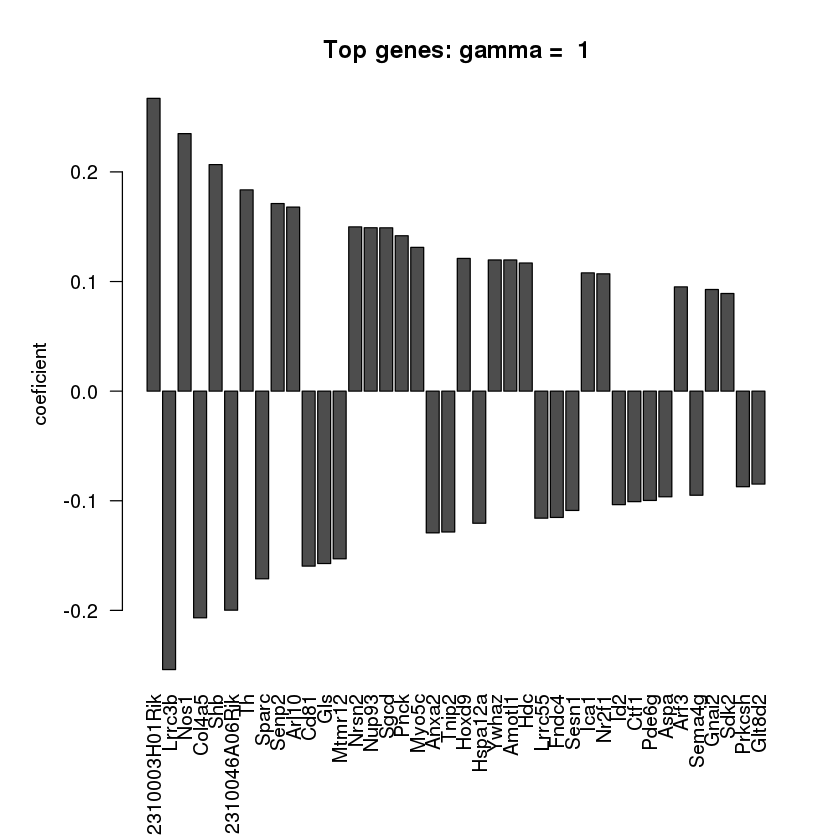

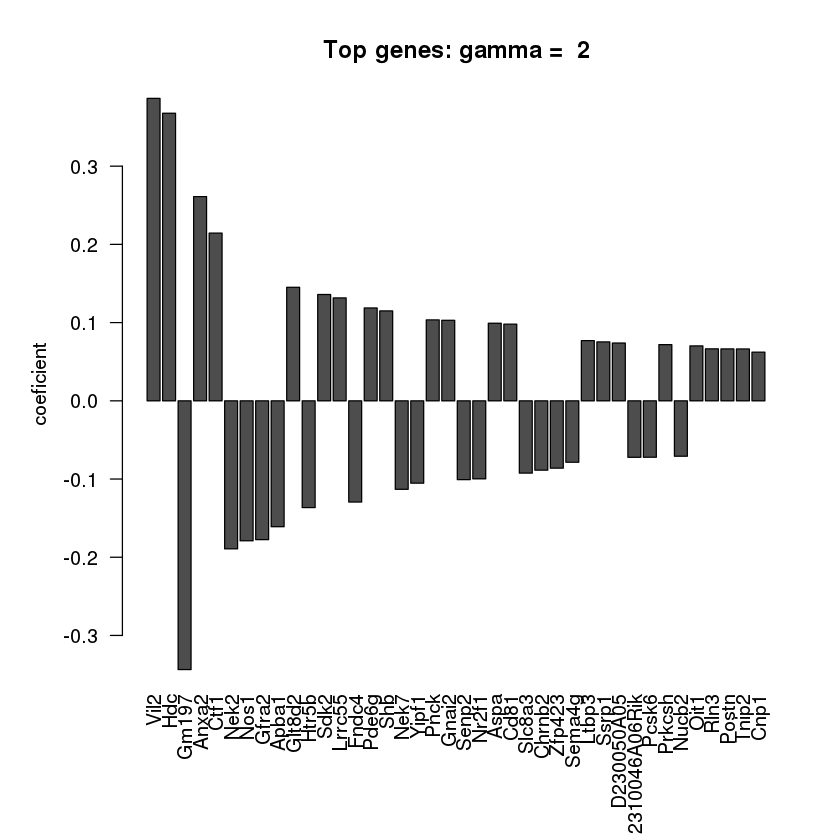

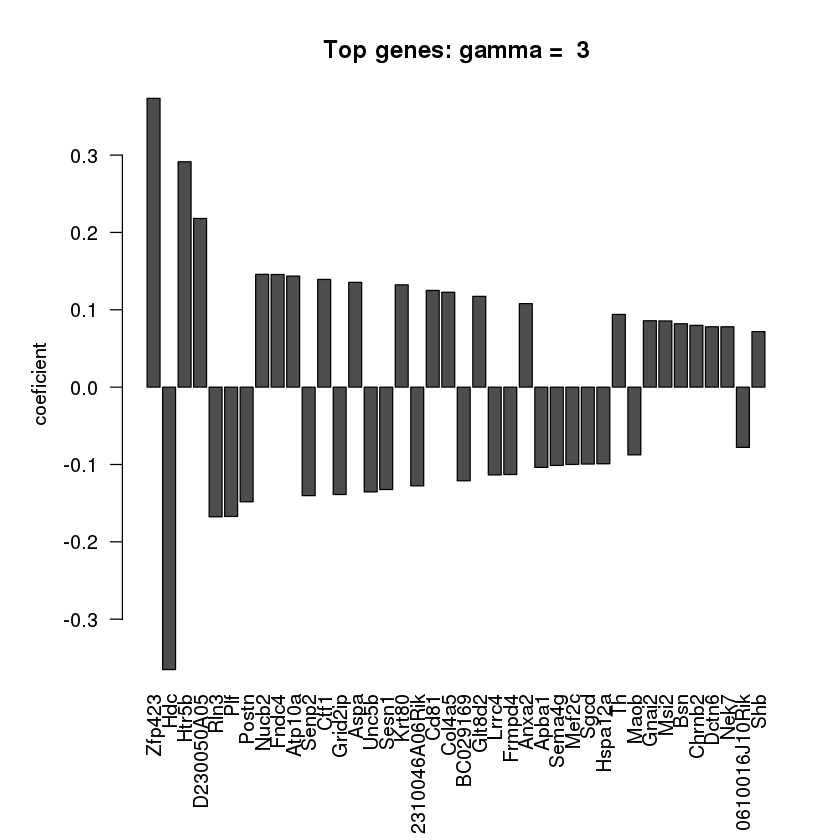

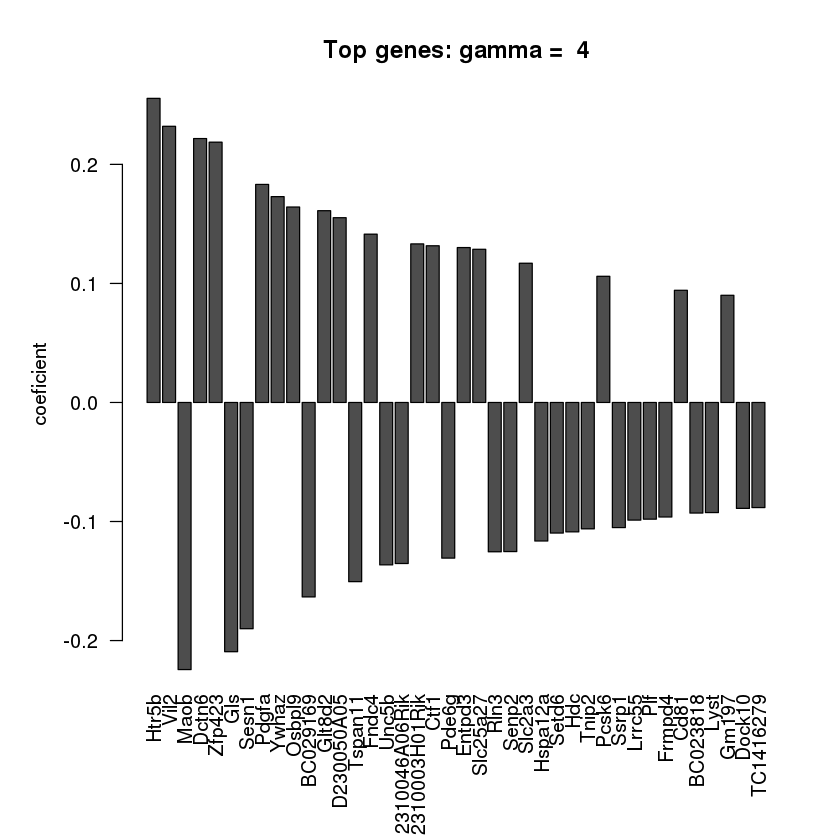

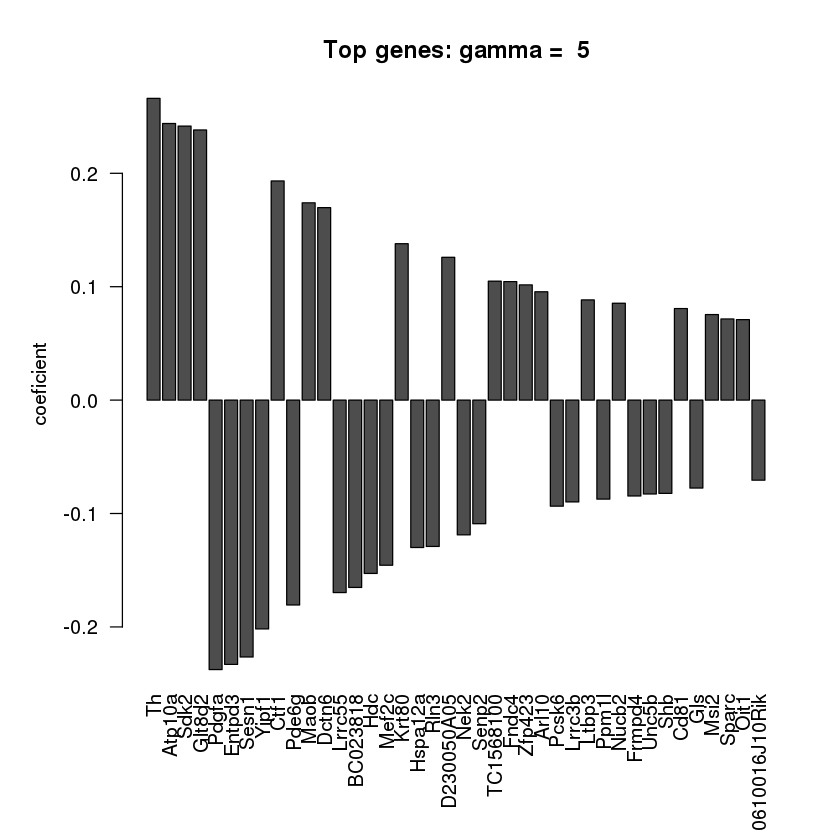

In [45]:
chdir_analysis <- chdirAnalysis(
    inputdatamat_downsampled,
    sample_classes_downsampled,
    list(1,2,3,4,5),
    CalculateSig=TRUE,
    nnull=10)

In [35]:
data(GeneOntology_BP.gmt)

In [61]:
PAEAtest <- PAEAAnalysis(chdir_analysis$chdirprops[[1]], gmt, example_gammas)

  |======================================================================| 100%


ERROR: Error in matrix(unlist(pvalues), ncol = length(gmtlines), dimnames = list(gammalabels, : length of 'dimnames' [1] not equal to array extent


In [68]:
chdir_analysis$results[[3]]

Zfp423        Hdc      Htr5b 
 0.3733363 -0.3651389  0.2913488

In [14]:
str(counts)

 Named int [1:8] 638 611 584 629 670 614 632 622
 - attr(*, "names")= chr [1:8] "TTT" "FTT" "TFT" "FFT" ...
